In [30]:
#Include this line to make plots interactive
%matplotlib notebook

#Dependencies and Set up 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Study data files
Vaccine_2021_data = "Vaccine_2021.csv"
Vaccine_2022_data = "Vaccine_2022.csv"
Vaccine_2023_data = "Vaccine_2023.csv"


# Read the 2021 data 
Vaccine_2021_data = pd.read_csv(Vaccine_2021_data, low_memory=False)
Vaccine_2021_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,...,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Administered_Dose1_Pop_Pct,0,0.1,0.2
0,9/17/2021,97.9,5379,37.8,0,0.0,5379,44.5,5187,47.6,...,70.6,14230,0,12099,10908,0,46.7,0,0,0
1,9/17/2021,96.3,17198,38.4,0,0.0,17192,45.2,16542,47.9,...,74.9,44829,0,38043,34516,0,46.1,0,0,0
2,9/17/2021,89.4,3996,45.2,0,0.0,3996,53.5,3754,56.1,...,65.0,8846,0,7465,6696,0,0.0,0,0,0
3,9/17/2021,92.4,6356,28.4,0,0.0,6356,32.6,6092,34.2,...,56.2,22394,0,19480,17837,0,36.6,0,0,0
4,9/17/2021,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0.0,54406,0,46621,42382,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345938,12/31/2021,94.6,383231,73.0,383222,77.2,369096,82.0,339081,83.3,...,95.0,524989,496254,450231,407024,88351,93.2,0,0,0
345939,12/31/2021,98.0,33256,50.8,33255,54.2,32878,59.1,31489,62.1,...,83.0,65435,61336,55643,50674,13513,55.3,0,0,0
345940,12/31/2021,99.1,34194,45.0,34193,48.3,33905,53.1,31905,54.3,...,95.0,75951,70826,63829,58799,8040,52.1,0,0,0
345941,12/31/2021,98.6,88307,55.8,88304,59.5,86501,65.1,80833,67.7,...,91.8,158167,148304,132804,119315,23480,63.3,0,0,0


In [31]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
Vaccine_2021_data2 = Vaccine_2021_data[["Date","Completeness_pct", "Series_Complete_Yes", "Series_Complete_Pop_Pct","Series_Complete_5Plus","Series_Complete_5PlusPop_Pct", "Series_Complete_12Plus","Series_Complete_12PlusPop_Pct","Series_Complete_18Plus","Series_Complete_18PlusPop_Pct", "Series_Complete_65Plus", "Series_Complete_65PlusPop_Pct","Census2019", "Census2019_5PlusPop","Census2019_12PlusPop", "Census2019_18PlusPop","Census2019_65PlusPop"]]
Vaccine_2021_data2.head()

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,9/17/2021,97.9,5379,37.8,0,0.0,5379,44.5,5187,47.6,1929,70.6,14230,0,12099,10908,0
1,9/17/2021,96.3,17198,38.4,0,0.0,17192,45.2,16542,47.9,6127,74.9,44829,0,38043,34516,0
2,9/17/2021,89.4,3996,45.2,0,0.0,3996,53.5,3754,56.1,1285,65.0,8846,0,7465,6696,0
3,9/17/2021,92.4,6356,28.4,0,0.0,6356,32.6,6092,34.2,2097,56.2,22394,0,19480,17837,0
4,9/17/2021,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,54406,0,46621,42382,0


In [32]:
Vaccine_2021_data2.fillna(0)

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,9/17/2021,97.9,5379,37.8,0,0.0,5379,44.5,5187,47.6,1929,70.6,14230,0,12099,10908,0
1,9/17/2021,96.3,17198,38.4,0,0.0,17192,45.2,16542,47.9,6127,74.9,44829,0,38043,34516,0
2,9/17/2021,89.4,3996,45.2,0,0.0,3996,53.5,3754,56.1,1285,65.0,8846,0,7465,6696,0
3,9/17/2021,92.4,6356,28.4,0,0.0,6356,32.6,6092,34.2,2097,56.2,22394,0,19480,17837,0
4,9/17/2021,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,54406,0,46621,42382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345938,12/31/2021,94.6,383231,73.0,383222,77.2,369096,82.0,339081,83.3,85722,95.0,524989,496254,450231,407024,88351
345939,12/31/2021,98.0,33256,50.8,33255,54.2,32878,59.1,31489,62.1,11218,83.0,65435,61336,55643,50674,13513
345940,12/31/2021,99.1,34194,45.0,34193,48.3,33905,53.1,31905,54.3,8106,95.0,75951,70826,63829,58799,8040
345941,12/31/2021,98.6,88307,55.8,88304,59.5,86501,65.1,80833,67.7,21546,91.8,158167,148304,132804,119315,23480


In [33]:
Vaccine_2021_data = pd.DataFrame(Vaccine_2021_data, columns=["Date","Completeness_pct", "Series_Complete_Yes", "Series_Complete_Pop_Pct","Series_Complete_5Plus","Series_Complete_5PlusPop_Pct", "Series_Complete_12Plus","Series_Complete_12PlusPop_Pct","Series_Complete_18Plus","Series_Complete_18PlusPop_Pct", "Series_Complete_65Plus", "Series_Complete_65PlusPop_Pct","Census2019", "Census2019_5PlusPop","Census2019_12PlusPop", "Census2019_18PlusPop","Census2019_65PlusPop"])
print(Vaccine_2021_data)

              Date  Completeness_pct  Series_Complete_Yes  \
0        9/17/2021              97.9                 5379   
1        9/17/2021              96.3                17198   
2        9/17/2021              89.4                 3996   
3        9/17/2021              92.4                 6356   
4        9/17/2021               0.0                    0   
...            ...               ...                  ...   
345938  12/31/2021              94.6               383231   
345939  12/31/2021              98.0                33256   
345940  12/31/2021              99.1                34194   
345941  12/31/2021              98.6                88307   
345942  12/31/2021              97.8               207956   

        Series_Complete_Pop_Pct  Series_Complete_5Plus  \
0                          37.8                      0   
1                          38.4                      0   
2                          45.2                      0   
3                          28.4    

In [34]:
Vaccine_2021_data2["Ages 5 to 17"]=Vaccine_2021_data["Series_Complete_5Plus"]+Vaccine_2021_data["Series_Complete_12Plus"]
print(Vaccine_2021_data2)

              Date  Completeness_pct  Series_Complete_Yes  \
0        9/17/2021              97.9                 5379   
1        9/17/2021              96.3                17198   
2        9/17/2021              89.4                 3996   
3        9/17/2021              92.4                 6356   
4        9/17/2021               0.0                    0   
...            ...               ...                  ...   
345938  12/31/2021              94.6               383231   
345939  12/31/2021              98.0                33256   
345940  12/31/2021              99.1                34194   
345941  12/31/2021              98.6                88307   
345942  12/31/2021              97.8               207956   

        Series_Complete_Pop_Pct  Series_Complete_5Plus  \
0                          37.8                      0   
1                          38.4                      0   
2                          45.2                      0   
3                          28.4    

C:\Users\afoy0\AppData\Local\Temp\ipykernel_13528\3104372550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2021_data2["Ages 5 to 17"]=Vaccine_2021_data["Series_Complete_5Plus"]+Vaccine_2021_data["Series_Complete_12Plus"]


In [36]:
Vaccine_2021_data2["Ages 5 to 17 Pct "]=Vaccine_2021_data["Series_Complete_5PlusPop_Pct"]+Vaccine_2021_data["Series_Complete_12PlusPop_Pct"]
print(Vaccine_2021_data2)

              Date  Completeness_pct  Series_Complete_Yes  \
0        9/17/2021              97.9                 5379   
1        9/17/2021              96.3                17198   
2        9/17/2021              89.4                 3996   
3        9/17/2021              92.4                 6356   
4        9/17/2021               0.0                    0   
...            ...               ...                  ...   
345938  12/31/2021              94.6               383231   
345939  12/31/2021              98.0                33256   
345940  12/31/2021              99.1                34194   
345941  12/31/2021              98.6                88307   
345942  12/31/2021              97.8               207956   

        Series_Complete_Pop_Pct  Series_Complete_5Plus  \
0                          37.8                      0   
1                          38.4                      0   
2                          45.2                      0   
3                          28.4    

C:\Users\afoy0\AppData\Local\Temp\ipykernel_13528\1901278275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2021_data2["Ages 5 to 17 Pct "]=Vaccine_2021_data["Series_Complete_5PlusPop_Pct"]+Vaccine_2021_data["Series_Complete_12PlusPop_Pct"]


In [37]:
Vaccine_2021_data2["Census 2019 Pop 5 to 17"]=Vaccine_2021_data["Census2019_5PlusPop"]+Vaccine_2021_data["Census2019_12PlusPop"]
print(Vaccine_2021_data2)

              Date  Completeness_pct  Series_Complete_Yes  \
0        9/17/2021              97.9                 5379   
1        9/17/2021              96.3                17198   
2        9/17/2021              89.4                 3996   
3        9/17/2021              92.4                 6356   
4        9/17/2021               0.0                    0   
...            ...               ...                  ...   
345938  12/31/2021              94.6               383231   
345939  12/31/2021              98.0                33256   
345940  12/31/2021              99.1                34194   
345941  12/31/2021              98.6                88307   
345942  12/31/2021              97.8               207956   

        Series_Complete_Pop_Pct  Series_Complete_5Plus  \
0                          37.8                      0   
1                          38.4                      0   
2                          45.2                      0   
3                          28.4    

In [42]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Vaccine_2021_data3 = Vaccine_2021_data2[["Date","Completeness_pct", "Series_Complete_Yes", "Series_Complete_Pop_Pct","Ages 5 to 17","Ages 5 to 17 Pct","Series_Complete_18Plus","Series_Complete_18PlusPop_Pct", "Series_Complete_65Plus", "Series_Complete_65PlusPop_Pct","Census2019", "Census 2019 Pop 5 to 17","Census2019_18PlusPop","Census2019_65PlusPop"]]
# Vaccine_2021_data3.head()
columns =["Date","Completeness_pct", "Series_Complete_Yes", "Series_Complete_Pop_Pct","Ages 5 to 17","Ages 5 to 17 Pct","Series_Complete_18Plus","Series_Complete_18PlusPop_Pct", "Series_Complete_65Plus", "Series_Complete_65PlusPop_Pct","Census2019", "Census 2019 Pop 5 to 17","Census2019_18PlusPop","Census2019_65PlusPop"]
Vaccine_2021_data2 =Vaccine_2021_data2.reindex(columns=columns)
Vaccine_2021_data2.head()

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Ages 5 to 17,Ages 5 to 17 Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census 2019 Pop 5 to 17,Census2019_18PlusPop,Census2019_65PlusPop
0,9/17/2021,97.9,5379,37.8,5379,NaN,5187,47.6,1929,70.6,14230,12099,10908,0
1,9/17/2021,96.3,17198,38.4,17192,NaN,16542,47.9,6127,74.9,44829,38043,34516,0
2,9/17/2021,89.4,3996,45.2,3996,NaN,3754,56.1,1285,65.0,8846,7465,6696,0
3,9/17/2021,92.4,6356,28.4,6356,NaN,6092,34.2,2097,56.2,22394,19480,17837,0
4,9/17/2021,0.0,0,0.0,0,NaN,0,0.0,0,0.0,54406,46621,42382,0


In [43]:
Vaccine_2021_data2.fillna(0)

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Ages 5 to 17,Ages 5 to 17 Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census 2019 Pop 5 to 17,Census2019_18PlusPop,Census2019_65PlusPop
0,9/17/2021,97.9,5379,37.8,5379,0.0,5187,47.6,1929,70.6,14230,12099,10908,0
1,9/17/2021,96.3,17198,38.4,17192,0.0,16542,47.9,6127,74.9,44829,38043,34516,0
2,9/17/2021,89.4,3996,45.2,3996,0.0,3754,56.1,1285,65.0,8846,7465,6696,0
3,9/17/2021,92.4,6356,28.4,6356,0.0,6092,34.2,2097,56.2,22394,19480,17837,0
4,9/17/2021,0.0,0,0.0,0,0.0,0,0.0,0,0.0,54406,46621,42382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345938,12/31/2021,94.6,383231,73.0,752318,0.0,339081,83.3,85722,95.0,524989,946485,407024,88351
345939,12/31/2021,98.0,33256,50.8,66133,0.0,31489,62.1,11218,83.0,65435,116979,50674,13513
345940,12/31/2021,99.1,34194,45.0,68098,0.0,31905,54.3,8106,95.0,75951,134655,58799,8040
345941,12/31/2021,98.6,88307,55.8,174805,0.0,80833,67.7,21546,91.8,158167,281108,119315,23480


In [45]:
#Rename Columns
Vaccine_2021_data2 = Vaccine_2021_data2.rename(columns={"Completeness_pct":"Complete Pct",
                                                        "Series_Complete_Yes":"Series Complete",
                                                        "Series_Complete_Pop_Pct":"Series Complete Population Pct",
                                                        "Ages 5 to 17":"Series Complete Ages 5 to 17",
                                                        "Ages 5 to 17 Pct":"Series Complete Ages 5 to 17 Pct",
                                                        "Series_Complete_18Plus":"Series Complete Ages 18+",
                                                        "Series_Complete_18PlusPop_Pct":"Series Complete Ages 18+ Pct",
                                                        "Series_Complete_65Plus":"Series Complete Ages 65+",
                                                        "Series_Complete_65PlusPop_Pct":"Series Complete Ages 65+ Pct",
                                                        "Census2019":"Census 2019",
                                                        "Census2019_18PlusPop":"Census 2019 18+ Pop",
                                                        "Census2019_65PlusPop":"Census 2019 65+ Pop"})
Vaccine_2021_data2.head()

,Date,Complete Pct,Series Complete,Series Complete Population Pct,Series Complete Ages 5 to 17,Series Complete Ages 5 to 17 Pct,Series Complete Ages 18+,Series Complete Ages 18+ Pct,Series Complete Ages 65+,Series Complete Ages 65+ Pct,Census 2019,Census 2019 Pop 5 to 17,Census 2019 18+ Pop,Census 2019 65+ Pop
0,9/17/2021,97.9,5379,37.8,5379,NaN,5187,47.6,1929,70.6,14230,12099,10908,0
1,9/17/2021,96.3,17198,38.4,17192,NaN,16542,47.9,6127,74.9,44829,38043,34516,0
2,9/17/2021,89.4,3996,45.2,3996,NaN,3754,56.1,1285,65.0,8846,7465,6696,0
3,9/17/2021,92.4,6356,28.4,6356,NaN,6092,34.2,2097,56.2,22394,19480,17837,0
4,9/17/2021,0.0,0,0.0,0,NaN,0,0.0,0,0.0,54406,46621,42382,0


In [46]:
Vaccine_2021_data2.fillna(0)

,Date,Complete Pct,Series Complete,Series Complete Population Pct,Series Complete Ages 5 to 17,Series Complete Ages 5 to 17 Pct,Series Complete Ages 18+,Series Complete Ages 18+ Pct,Series Complete Ages 65+,Series Complete Ages 65+ Pct,Census 2019,Census 2019 Pop 5 to 17,Census 2019 18+ Pop,Census 2019 65+ Pop
0,9/17/2021,97.9,5379,37.8,5379,0.0,5187,47.6,1929,70.6,14230,12099,10908,0
1,9/17/2021,96.3,17198,38.4,17192,0.0,16542,47.9,6127,74.9,44829,38043,34516,0
2,9/17/2021,89.4,3996,45.2,3996,0.0,3754,56.1,1285,65.0,8846,7465,6696,0
3,9/17/2021,92.4,6356,28.4,6356,0.0,6092,34.2,2097,56.2,22394,19480,17837,0
4,9/17/2021,0.0,0,0.0,0,0.0,0,0.0,0,0.0,54406,46621,42382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345938,12/31/2021,94.6,383231,73.0,752318,0.0,339081,83.3,85722,95.0,524989,946485,407024,88351
345939,12/31/2021,98.0,33256,50.8,66133,0.0,31489,62.1,11218,83.0,65435,116979,50674,13513
345940,12/31/2021,99.1,34194,45.0,68098,0.0,31905,54.3,8106,95.0,75951,134655,58799,8040
345941,12/31/2021,98.6,88307,55.8,174805,0.0,80833,67.7,21546,91.8,158167,281108,119315,23480


In [54]:
Vaccine_2021_data2.mean()

C:\Users\afoy0\AppData\Local\Temp\ipykernel_13528\3476776028.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Vaccine_2021_data2.mean()


Complete Pct                            89.482632
Series Complete                      56961.505919
Series Complete Population Pct          42.949633
Series Complete Ages 5 to 17         70343.528203
Series Complete Ages 5 to 17 Pct              NaN
Series Complete Ages 18+             52995.782311
Series Complete Ages 18+ Pct            51.825475
Series Complete Ages 65+             13843.350488
Series Complete Ages 65+ Pct            69.420325
Census 2019                         101034.926025
Census 2019 Pop 5 to 17             107923.868736
Census 2019 18+ Pop                  78592.845550
Census 2019 65+ Pop                    316.549142
dtype: float64

In [56]:
print(Vaccine_2021_data2[['Complete Pct','Series Complete Population Pct','Series Complete Ages 5 to 17 Pct','Series Complete Ages 18+ Pct','Series Complete Ages 65+ Pct']].mean())

Complete Pct                        89.482632
Series Complete Population Pct      42.949633
Series Complete Ages 5 to 17 Pct          NaN
Series Complete Ages 18+ Pct        51.825475
Series Complete Ages 65+ Pct        69.420325
dtype: float64


In [61]:
# Labels for the sections of our pie chart
labels = ["Series Complete Ages 18+ Pct", "Series Complete Ages 65+ Pct"]

# The values of each section of the pie chart
sizes = [5, 6]

# The colors of each section of the pie chart
colors = ["red", "orange"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0)

<IPython.core.display.Javascript object>


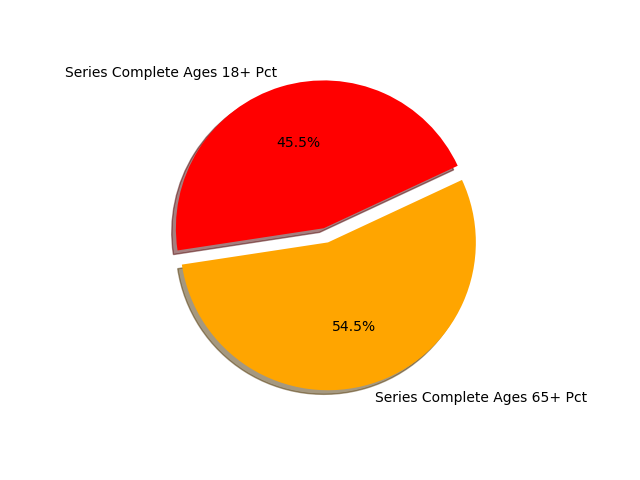

([<matplotlib.patches.Wedge at 0x28c55e963b0>,
 [Text(-0.34720273416094, 1.1486732613720787, 'Series Complete Ages 18+ Pct'),
  Text(0.31826927156519963, -1.0529504597925572, 'Series Complete Ages 65+ Pct')],
 [Text(-0.20253492826054834, 0.6700594024670459, '45.5%'),
  Text(0.17360142085374522, -0.5743366144323038, '54.5%')])

In [66]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=25)

In [67]:
points = ["Series Complete Ages 5 to 17 Pct","Series Complete Ages 18+ Pct", "Series Complete Ages 65+ Pct"]
x_axis
#Plot line
plt.plot(x_axis_data, points)
plt.show

NameError: name 'x_axis_data' is not defined

In [55]:
Vaccine_2021_data2.describe()

,Complete Pct,Series Complete,Series Complete Population Pct,Series Complete Ages 5 to 17,Series Complete Ages 5 to 17 Pct,Series Complete Ages 18+,Series Complete Ages 18+ Pct,Series Complete Ages 65+,Series Complete Ages 65+ Pct,Census 2019,Census 2019 Pop 5 to 17,Census 2019 18+ Pop,Census 2019 65+ Pop
count,345943.000000,3.459430e+05,345943.000000,3.459430e+05,0.0,3.459430e+05,345943.000000,3.459430e+05,345943.000000,3.459430e+05,3.459430e+05,3.459430e+05,3.459430e+05
mean,89.482632,5.696151e+04,42.949633,7.034353e+04,NaN,5.299578e+04,51.825475,1.384335e+04,69.420325,1.010349e+05,1.079239e+05,7.859285e+04,3.165491e+02
std,19.114762,2.016674e+05,16.072801,2.687055e+05,NaN,1.861618e+05,18.632960,4.074254e+04,22.579178,3.267322e+05,3.731814e+05,2.539248e+05,7.015277e+03
min,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,92.200000,3.997000e+03,35.800000,4.367000e+03,NaN,3.806000e+03,44.300000,1.382000e+03,64.200000,1.054200e+04,1.047100e+04,8.099500e+03,0.000000e+00
50%,95.700000,1.101400e+04,43.800000,1.272200e+04,NaN,1.048000e+04,53.600000,3.544000e+03,75.200000,2.527400e+04,2.579900e+04,1.992300e+04,0.000000e+00
75%,97.600000,3.228950e+04,52.600000,3.848450e+04,NaN,3.044600e+04,63.300000,9.449000e+03,83.500000,6.655100e+04,7.053000e+04,5.139900e+04,0.000000e+00
max,99.100000,6.757813e+06,100.000000,1.337032e+07,NaN,6.082273e+06,100.000000,1.177126e+06,100.000000,1.003911e+07,1.807876e+07,7.894557e+06,1.413753e+06


In [18]:
# Read the 2022 data 
Vaccine_2022_data = pd.read_csv(Vaccine_2022_data, low_memory=False)
Vaccine_2022_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,...,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Administered_Dose1_Pop_Pct,0
0,1/1/2022,73.7,5602,77.4,5602,81.2,0,0.0,5411,84.8,...,1719,95.0,7235,6900,0,6384,5933,1557,87.9,0
1,1/1/2022,96.2,24798,51.7,24797,54.2,0,0.0,24377,57.3,...,6830,85.1,47935,45743,0,42545,39869,8030,58.0,0
2,1/1/2022,90.3,4061,40.3,4061,43.3,0,0.0,4016,48.1,...,1467,66.3,10067,9382,0,8357,7520,2214,0.0,0
3,1/1/2022,94.9,11549,46.4,11549,49.7,0,0.0,11442,54.5,...,3677,77.3,24909,23259,0,21003,19211,4759,54.1,0
4,1/1/2022,94.1,16051,43.1,16051,46.2,0,0.0,15956,51.1,...,5387,76.7,37266,34724,0,31218,28286,7024,48.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640250,12/28/2022,98.6,42160,45.8,42106,48.8,2708,17.8,41335,52.9,...,14585,79.4,91987,86197,15201,78171,70996,18364,48.6,0
640251,12/28/2022,98.0,17799,46.3,17789,49.1,1009,16.3,17514,53.2,...,6253,77.9,38469,36194,6201,32945,29993,8024,50.7,0
640252,12/28/2022,98.0,30050,59.3,29999,62.6,2969,34.7,29054,66.8,...,8420,86.7,50643,47904,8546,43496,39358,9711,63.8,0
640253,12/28/2022,98.2,5046,56.1,5041,59.7,664,49.6,4810,62.2,...,1253,83.6,8988,8444,1338,7731,7106,1499,64.6,0


In [19]:
Vaccine_2022_data["Series_Complete_Yes"].mean()

65757.64342644728

In [21]:
# Read the 2023 data 
Vaccine_2023_data = pd.read_csv(Vaccine_2023_data, low_memory=False)
Vaccine_2023_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,...,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Administered_Dose1_Pop_Pct
0,1/4/2023,93.9,3580,58.7,3575,61.3,259,30.7,3482,64.7,...,66.5,1051,80.9,6102,5830,845,5379,4985,1299,60.3
1,1/4/2023,97.0,20253,75.9,20165,80.4,2797,60.9,18976,84.4,...,84.8,4568,95.0,26675,25069,4595,22494,20474,4469,95.0
2,1/4/2023,91.3,1771,28.2,1771,29.7,68,7.2,1764,32.1,...,34.0,637,42.9,6270,5961,949,5499,5012,1484,32.7
3,1/4/2023,97.3,24904,81.6,24890,84.6,3311,78.8,23473,86.3,...,85.6,5554,87.5,30504,29420,4203,27205,25217,6351,90.5
4,1/4/2023,88.9,3278,48.4,3275,51.1,264,26.1,3186,54.5,...,55.7,1054,62.9,6778,6412,1011,5850,5401,1677,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62372,5/10/2023,91.3,3057,33.3,3055,34.9,85,6.3,3033,37.5,...,40.0,1402,52.2,9174,8756,1340,8086,7416,2684,41.0
62373,5/10/2023,96.7,13461,76.8,13436,82.2,1319,43.0,12911,88.4,...,91.2,3593,95.0,17526,16351,3066,14600,13285,3158,93.4
62374,5/10/2023,94.0,23657,45.7,23634,48.0,1529,18.9,23260,51.6,...,53.8,8384,75.2,51787,49229,8105,45057,41124,11149,51.8
62375,5/10/2023,95.1,14030,56.3,13979,60.1,1005,24.8,13710,65.3,...,67.5,3909,82.1,24909,23259,4048,21003,19211,4759,65.2


In [22]:
Vaccine_2023_data["Series_Complete_Yes"].mean()

69418.25131057922

In [ ]:
# Labels for the sections of our pie chart
labels = ["Age 5-17", "Age 18-65", "Age 65+"]

# The values of each section of the pie chart
sizes = [#, #, #, #]

# The colors of each section of the pie chart
colors = ["red", "orange", "purple", "lightskyblue"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0, 0, 0)

In [ ]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

In [ ]:
#Save and display the chart
plt.savefig("Images/chart.png")
plt.show()